# Recommender System Small Scale Testing

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import graphlab as gl
import random

## Upload Song-User Matrix

Since the complete song-user matrix is extremely large, I will randomly sample from the locally stored csv file for training and testing; rather than uploading the entire file.

In [2]:
#Set random seed

random.seed(21)

#Find cleaned user song matrix

file = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 1_Mus_Recomend/Data/msd_song_user_matrix.csv')

#Count number of records

n = sum(1 for line in open(file)) #number of records in file (excludes header)

s = 20000 # sample size to draw

# Create random skip pattern for pandas

skip = sorted(random.sample(xrange(1,n+1),n-s))

In [3]:
#Use random sample to upload selected data to a DF

user_song_matrix = pd.read_csv(file, na_values = 'NaN', index_col = 0, skiprows=skip)

user_song_matrix.head()

,artist_familiarity,artist_hotttnesss,artist_id,artist_name,release,song_hotttnesss,song_id,title,duration,key,loudness,mode,tempo,time_signature,year,user_id,play_count,play
10736,0.682101,0.424108,ARPATQ21187B9ACAFC,Happy Mondays,"""Pills 'n' Thrills And Bellyaches""",0.587427,SOXHHAO12A8C139833,Holiday,208.74404,9.0,-13.301,0.0,117.819,4.0,1990.0,71744020075ed5d4a1570b7edc092a4fb940712f,1.0,1.0
18924,0.791802,0.637302,ARKZ13R1187FB54FEE,Josh Turner,Haywire,0.520689,SOMRPIR12AB018623A,"""I'll Be There""",217.52118,2.0,-11.703,1.0,146.762,7.0,NaN,4d2b4a0faa753dedb539ed97edb6b7278b1ce688,1.0,1.0
31681,0.623082,0.459220,ARNFXPT1187FB39D5B,Base Ball Bear,Yuugata Generation,0.533910,SOQCGHN12AB0181246,Sayonara-Nostalgia,255.60771,11.0,-5.047,1.0,132.738,4.0,2005.0,c1a14e42202a72c12e76d3fca41a57f603e32cd2,19.0,1.0
33085,0.895297,0.585868,ARIRCA31187FB58E84,The Maine,The Way We Talk,0.675984,SOPBLAH12A8AE48F91,We Change_ We Wait,203.80689,0.0,-5.188,1.0,151.993,4.0,2007.0,5f3708108a564cd6489e215a07c8cb2316ef7e13,1.0,1.0
40041,0.711564,0.574357,AR3DXTG1187FB38776,Kate Bush,The Kick Inside,0.762013,SOTVOMT12A6310E094,The Kick Inside,214.83057,1.0,-20.068,1.0,139.114,4.0,1978.0,bcca23a9c9d3dd91a847dfe50df779691dac3136,3.0,1.0


In [4]:
user_song_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 10736 to 48902416
Data columns (total 18 columns):
artist_familiarity    16725 non-null float64
artist_hotttnesss     16726 non-null float64
artist_id             16726 non-null object
artist_name           16726 non-null object
release               16726 non-null object
song_hotttnesss       14513 non-null float64
song_id               20000 non-null object
title                 16726 non-null object
duration              16726 non-null float64
key                   16726 non-null float64
loudness              16726 non-null float64
mode                  16726 non-null float64
tempo                 16726 non-null float64
time_signature        16726 non-null float64
year                  13251 non-null float64
user_id               19764 non-null object
play_count            20000 non-null float64
play                  20000 non-null float64
dtypes: float64(12), object(6)
memory usage: 2.9+ MB


Convert objects to string and floats to int. This is to facilitate conversion to GraphLab's SFrame format. An SF will not accept a pandas column whose type is an object.

In [5]:
#Convert object to string

user_song_matrix[['artist_id','artist_name','release','song_id','title','user_id']] = user_song_matrix[['artist_id','artist_name','release','song_id','title','user_id']].astype('|S250')

In [6]:
#Convert float to int

user_song_matrix[['play','play_count']] = user_song_matrix[['play','play_count']].astype('int')

## Convert Pandas DataFrame to SFrame

Convert DF to GraphLab dataframe format to use libraries recommendation algorithms.

In [7]:
sample_sf = gl.SFrame(data=user_song_matrix)

sample_sf

This non-commercial license of GraphLab Create for academic use is assigned to ivette1989@gmail.com and will expire on August 19, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1534909808.log


artist_familiarity,artist_hotttnesss,artist_id,artist_name,release
0.682101281711,0.424108277416,ARPATQ21187B9ACAFC,Happy Mondays,"""Pills 'n' Thrills AndBellyaches"" ..."
0.791801555556,0.637302342502,ARKZ13R1187FB54FEE,Josh Turner,Haywire
0.623081832214,0.459220147125,ARNFXPT1187FB39D5B,Base Ball Bear,Yuugata Generation
0.895297124651,0.585867596138,ARIRCA31187FB58E84,The Maine,The Way We Talk
0.711563637071,0.574357145987,AR3DXTG1187FB38776,Kate Bush,The Kick Inside
0.847451713218,0.779968004597,ARPAAHK1187B9ABB00,Nickelback,Dark Horse
nan,nan,nan,nan,nan
0.635704111761,0.436317650242,ARNCXKC1187FB38C42,Sheena Easton,The World Of SheenaEaston - The Singles ...
0.852136186667,0.780334119573,ART5MUE1187B98C961,Metallica,Reload
0.862749947386,0.540101990129,AR8K3HD1187B9B9CA9,Goldfrapp,Felt Mountain


## Create random 70%/30% train - test split

In [8]:
train, test = sample_sf.random_split(.7, seed=5)

print(len(train), len(test))

(14041, 5959)


## Create Baseline: Song Popularity Based Recommender

This model is used as a frame of reference for the subsequent approaches. This recomender does  not have any personalization at all. It recommends the most popular items to users.

Model Documentation: https://turi.com/products/create/docs/generated/graphlab.recommender.popularity_recommender.create.html#graphlab.recommender.popularity_recommender.create

*Create Song Popularity Recomender*

In [9]:
song_popularity =  gl.popularity_recommender.create(train, 
                                                    item_id = 'song_id',
                                                    user_id='user_id')

Recsys training: model = popularity

Warning: Ignoring columns artist_familiarity, artist_hotttnesss, artist_id, artist_name, release, song_hotttnesss, title, duration, key, loudness, mode, tempo, time_signature, year, play_count, play;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 14041 observations with 13631 users and 10569 items.

Data prepared in: 0.091787s

14041 observations to process; with 10569 unique items.

**Evaluate Song Popularity Recomender Precision and Recall on Test Data**

In [10]:
eval_song_pop = song_popularity.evaluate_precision_recall(test)

eval_song_pop

recommendations finished on 1000/5870 queries. users per second: 17516.5

recommendations finished on 2000/5870 queries. users per second: 15990.2

recommendations finished on 3000/5870 queries. users per second: 15600.9

recommendations finished on 4000/5870 queries. users per second: 16944.8

recommendations finished on 5000/5870 queries. users per second: 18217.3

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 105660
 
 Data:
 +-------------------------------+--------+-----------+--------+-------+
 |            user_id            | cutoff | precision | recall | count |
 +-------------------------------+--------+-----------+--------+-------+
 | 0002e94348b2543c6e6ccf408b... |   1    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   2    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   3    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   4    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   5    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   6    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   7    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   8    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   9    |    0.0    |  0.0  

See top 5 recommended songs.

In [11]:
song_popularity.recommend(k=5)

recommendations finished on 1000/13631 queries. users per second: 29304

recommendations finished on 2000/13631 queries. users per second: 29069.3

recommendations finished on 3000/13631 queries. users per second: 29438.9

recommendations finished on 4000/13631 queries. users per second: 29733.4

recommendations finished on 5000/13631 queries. users per second: 29753.9

recommendations finished on 6000/13631 queries. users per second: 29718.6

recommendations finished on 7000/13631 queries. users per second: 29510.1

recommendations finished on 8000/13631 queries. users per second: 28815.3

recommendations finished on 9000/13631 queries. users per second: 28189.9

recommendations finished on 10000/13631 queries. users per second: 28349.7

recommendations finished on 11000/13631 queries. users per second: 28106.6

recommendations finished on 12000/13631 queries. users per second: 28178.3

recommendations finished on 13000/13631 queries. users per second: 27979.4

user_id,song_id,score,rank
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOFRQTD12A81C233C0,29.0,1
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOAUWYT12A81C206F1,28.0,2
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOAXGDH12A8C13F8A1,27.0,3
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOSXLTC12AF72A7F54,26.0,4
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOEGIYH12A6D4FC0E3,22.0,5
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOFRQTD12A81C233C0,29.0,1
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOAUWYT12A81C206F1,28.0,2
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOAXGDH12A8C13F8A1,27.0,3
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOSXLTC12AF72A7F54,26.0,4
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOEGIYH12A6D4FC0E3,22.0,5


## Create Baseline: Artist Popularity Based Recommender

In [12]:
user_song_matrix_art = user_song_matrix[user_song_matrix['artist_id'] != 'nan']

sample2_sf = gl.SFrame(data=user_song_matrix_art)

train_art, test_art = sample2_sf.random_split(.7, seed=5)

print(len(train_art), len(test_art))

(11671, 5055)


This model is used as a frame of reference for the subsequent approaches. This recomender does  not have any personalization at all. It recomends the most popular artists to users.

Model Documentation: https://turi.com/products/create/docs/generated/graphlab.recommender.popularity_recommender.create.html#graphlab.recommender.popularity_recommender.create

*Create Artist Popularity Recomender*

In [13]:
artist_popularity = gl.popularity_recommender.create(train_art,
                                                     user_id = 'user_id',
                                                     item_id = 'artist_id')

Recsys training: model = popularity

Warning: Ignoring columns artist_familiarity, artist_hotttnesss, artist_name, release, song_hotttnesss, song_id, title, duration, key, loudness, mode, tempo, time_signature, year, play_count, play;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 11671 observations with 11327 users and 4354 items.

Data prepared in: 0.070849s

11671 observations to process; with 4354 unique items.

**Evaluate Artist Popularity Recomender Precision and Recall**

In [14]:
eval_artist_pop = artist_popularity.evaluate_precision_recall(test_art)

eval_artist_pop

recommendations finished on 1000/4956 queries. users per second: 38019.9

recommendations finished on 2000/4956 queries. users per second: 35811.5

recommendations finished on 3000/4956 queries. users per second: 37261.1

recommendations finished on 4000/4956 queries. users per second: 36157.9

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 89208
 
 Data:
 +-------------------------------+--------+-----------+--------+-------+
 |            user_id            | cutoff | precision | recall | count |
 +-------------------------------+--------+-----------+--------+-------+
 | 00154598d7b6c732217db98ca6... |   1    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   2    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   3    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   4    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   5    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   6    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   7    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   8    |    0.0    |  0.0   |   1   |
 | 00154598d7b6c732217db98ca6... |   9    |    0.0    |  0.0   

*Find top 5 artist recomendations*

In [15]:
artist_popularity.recommend(k=5)

recommendations finished on 1000/11327 queries. users per second: 62597.8

recommendations finished on 2000/11327 queries. users per second: 64401.9

recommendations finished on 3000/11327 queries. users per second: 62634.4

recommendations finished on 4000/11327 queries. users per second: 62759.9

recommendations finished on 5000/11327 queries. users per second: 62662.9

recommendations finished on 6000/11327 queries. users per second: 63537.1

recommendations finished on 7000/11327 queries. users per second: 62564.8

recommendations finished on 8000/11327 queries. users per second: 62039.6

recommendations finished on 9000/11327 queries. users per second: 60954.5

recommendations finished on 10000/11327 queries. users per second: 60911

recommendations finished on 11000/11327 queries. users per second: 60226.1

user_id,artist_id,score,rank
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,ARF2EHS1187B994F4E,71.0,1
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,ARJ7KF01187B98D717,66.0,2
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,ARNCHOP121318C56B8,53.0,3
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,ARF8HTQ1187B9AE693,51.0,4
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,ARR3ONV1187B9A2F59,49.0,5
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,ARF2EHS1187B994F4E,71.0,1
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,ARJ7KF01187B98D717,66.0,2
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,ARNCHOP121318C56B8,53.0,3
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,ARF8HTQ1187B9AE693,51.0,4
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,ARR3ONV1187B9A2F59,49.0,5


## Content - Based Recommender

Model Documentation:

https://turi.com/products/create/docs/generated/graphlab.recommender.item_content_recommender.create.html#graphlab.recommender.item_content_recommender.create

In [16]:
train_item_data = train[['artist_familiarity','artist_hotttnesss','artist_id','artist_name',
                         'release','song_hotttnesss','song_id','title','duration','key',
                         'loudness','mode','tempo','time_signature','year']]

obs_data = train[['user_id','song_id','play']]

In [17]:
content = gl.item_content_recommender.create(train_item_data,
                                             item_id = 'song_id',
                                             user_id = 'user_id',
                                             observation_data = obs_data)

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_name', 'release', 'song_hotttnesss', 'title', 'duration', 'key', 'loudness', 'mode', 'tempo', 'time_signature', 'year']
Excluded Features : ['song_id']

Column              Type   Interpretation  Transforms  Output Type
------------------  -----  --------------  ----------  -----------
artist_familiarity  float  numerical       None        float      
artist_hotttnesss   float  numerical       None        float      
artist_id           str    categorical     None        str        
artist_name         str    categorical     None        str        
release             str    categorical     None        str        
song_hotttnesss     float  numerical       None        float      
title               str    categorical     None        str        
duration            float  numerical       None        float      
key 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 14041   | 0.007122    | 54.449ms     |

| 228          | 3201348 | 1.62382     | 1.05s        |

| 460          | 6458860 | 3.27612     | 2.06s        |

| 714          | 1e+07   | 5.08511     | 3.06s        |

| 973          | 1.4e+07 | 6.92971     | 4.07s        |

| 1229         | 1.7e+07 | 8.75294     | 5.07s        |

| 1497         | 2.1e+07 | 10.6616     | 6.08s        |

| 1766         | 2.5e+07 | 12.5775     | 7.08s        |

| 1988         | 2.8e+07 | 14.1585     | 8.09s        |

| 2206         | 3.1e+07 | 15.7111     | 9.09s        |

| 2474         | 3.5e+07 | 17.6198     | 10.10s       |

| 2680         | 3.8e+07 | 19.087      | 11.10s       |

| 2865         | 4e+07   | 20.4045     | 12.11s       |

| 3072         | 4.3e+07 | 21.8788     | 13.11s       |

| 3252         | 4.6e+07 | 23.1607     | 14.12s       |

| 3435         | 4.8e+07 | 24.4641     | 15.12s       |

| 3694         | 5.2e+07 | 26.3087     | 16.12s       |

| 3893         | 5.5e+07 | 27.7259     | 17.13s       |

| 4102         | 5.8e+07 | 29.2144     | 18.13s       |

| 4304         | 6e+07   | 30.6531     | 19.14s       |

| 4531         | 6.4e+07 | 32.2698     | 20.14s       |

| 4750         | 6.7e+07 | 33.8295     | 21.14s       |

| 4993         | 7e+07   | 35.5601     | 22.16s       |

| 5250         | 7.4e+07 | 37.3905     | 23.16s       |

| 5506         | 7.7e+07 | 39.2137     | 24.16s       |

| 5724         | 8e+07   | 40.7663     | 25.17s       |

| 5915         | 8.3e+07 | 42.1266     | 26.17s       |

| 5997         | 8.4e+07 | 42.7106     | 27.17s       |

| 6176         | 8.7e+07 | 43.9855     | 28.17s       |

| 6330         | 8.9e+07 | 45.0823     | 29.18s       |

| 6530         | 9.2e+07 | 46.5067     | 30.19s       |

| 6737         | 9.5e+07 | 47.9809     | 31.20s       |

| 6865         | 9.6e+07 | 48.8925     | 32.20s       |

| 7105         | 1e+08   | 50.6018     | 33.20s       |

| 7362         | 1e+08   | 52.4322     | 34.20s       |

| 7627         | 1.1e+08 | 54.3195     | 35.20s       |

| 7896         | 1.1e+08 | 56.2353     | 36.21s       |

| 8157         | 1.1e+08 | 58.0942     | 37.21s       |

| 8440         | 1.2e+08 | 60.1097     | 38.22s       |

| 8720         | 1.2e+08 | 62.1038     | 39.22s       |

| 9013         | 1.3e+08 | 64.1906     | 40.23s       |

| 9299         | 1.3e+08 | 66.2275     | 41.23s       |

| 9579         | 1.3e+08 | 68.2216     | 42.24s       |

| 9863         | 1.4e+08 | 70.2443     | 43.24s       |

| 10142        | 1.4e+08 | 72.2313     | 44.24s       |

| 10354        | 1.5e+08 | 73.7412     | 45.25s       |

| 10618        | 1.5e+08 | 75.6214     | 46.25s       |

| 10899        | 1.5e+08 | 77.6227     | 47.26s       |

| 11179        | 1.6e+08 | 79.6168     | 48.26s       |

| 11460        | 1.6e+08 | 81.6181     | 49.27s       |

| 11748        | 1.6e+08 | 83.6693     | 50.27s       |

| 12030        | 1.7e+08 | 85.6777     | 51.27s       |

| 12310        | 1.7e+08 | 87.6718     | 52.28s       |

| 12596        | 1.8e+08 | 89.7087     | 53.29s       |

| 12876        | 1.8e+08 | 91.7029     | 54.29s       |

| 13159        | 1.8e+08 | 93.7184     | 55.29s       |

| 13442        | 1.9e+08 | 95.7339     | 56.30s       |

| 13728        | 1.9e+08 | 97.7708     | 57.30s       |

| 14004        | 2e+08   | 99.7365     | 58.31s       |

| Done         |         | 100         | 58.46s       |

+--------------+---------+-------------+--------------+

Warning: Column 'play' ignored.

To use this column as the target, set target = "play" and use a method that allows the use of a target.

Preparing data set.

Data has 14041 observations with 13631 users and 10569 items.

Data prepared in: 0.929653s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.073936s

**Evaluate Content Based Recomender Precision and Recall**

In [18]:
eval_content = content.evaluate_precision_recall(test)

eval_content

recommendations finished on 1000/5870 queries. users per second: 9129.25

recommendations finished on 2000/5870 queries. users per second: 9493.21

recommendations finished on 3000/5870 queries. users per second: 9660.96

recommendations finished on 4000/5870 queries. users per second: 9815.83

recommendations finished on 5000/5870 queries. users per second: 9213.38

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 105660
 
 Data:
 +-------------------------------+--------+-----------+--------+-------+
 |            user_id            | cutoff | precision | recall | count |
 +-------------------------------+--------+-----------+--------+-------+
 | 0002e94348b2543c6e6ccf408b... |   1    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   2    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   3    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   4    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   5    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   6    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   7    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   8    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   9    |    0.0    |  0.0  

*Find top 5 per user recomendations*

In [19]:
content.recommend(k=5)

recommendations finished on 1000/13631 queries. users per second: 13176.1

recommendations finished on 2000/13631 queries. users per second: 14180.6

recommendations finished on 3000/13631 queries. users per second: 13963.4

recommendations finished on 4000/13631 queries. users per second: 13745.2

recommendations finished on 5000/13631 queries. users per second: 13673.5

recommendations finished on 6000/13631 queries. users per second: 13574.2

recommendations finished on 7000/13631 queries. users per second: 13528.6

recommendations finished on 8000/13631 queries. users per second: 13630.2

recommendations finished on 9000/13631 queries. users per second: 12773.8

recommendations finished on 10000/13631 queries. users per second: 12271.3

recommendations finished on 11000/13631 queries. users per second: 12393.5

recommendations finished on 12000/13631 queries. users per second: 12423.3

recommendations finished on 13000/13631 queries. users per second: 12397.8

user_id,song_id,score,rank
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOFRQTD12A81C233C0,1.0,1
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOAUWYT12A81C206F1,0.964285714286,2
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOAXGDH12A8C13F8A1,0.928571428571,3
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOSXLTC12AF72A7F54,0.892857142857,4
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOEGIYH12A6D4FC0E3,0.75,5
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOFRQTD12A81C233C0,1.0,1
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOAUWYT12A81C206F1,0.964285714286,2
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOAXGDH12A8C13F8A1,0.928571428571,3
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOSXLTC12AF72A7F54,0.892857142857,4
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOEGIYH12A6D4FC0E3,0.75,5


## Item - Item Recommender

Documentation for this model:

https://turi.com/products/create/docs/generated/graphlab.recommender.item_similarity_recommender.create.html#graphlab.recommender.item_similarity_recommender.create

*Create Item - Item Recomender*

In [20]:
item_rec = gl.item_similarity_recommender.create(train,
                                              user_id = 'user_id',
                                              item_id = 'song_id',
                                              similarity_type = 'pearson')

Recsys training: model = item_similarity

Warning: Ignoring columns artist_familiarity, artist_hotttnesss, artist_id, artist_name, release, song_hotttnesss, title, duration, key, loudness, mode, tempo, time_signature, year, play_count, play;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 14041 observations with 13631 users and 10569 items.

Data prepared in: 0.09435s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 23.906ms                       | 29.25      |

| 27.264ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 579.662ms                           | 0                | 0               |

| 1.33s                               | 100              | 10569           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.34735s

**Evaluate Item - Item Recomender Precision and Recall on Test Data**

In [21]:
eval_item = content.evaluate_precision_recall(test)

eval_item

recommendations finished on 1000/5870 queries. users per second: 15603.1

recommendations finished on 2000/5870 queries. users per second: 16051.1

recommendations finished on 3000/5870 queries. users per second: 16523.7

recommendations finished on 4000/5870 queries. users per second: 16779.8

recommendations finished on 5000/5870 queries. users per second: 16922.3

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 105660
 
 Data:
 +-------------------------------+--------+-----------+--------+-------+
 |            user_id            | cutoff | precision | recall | count |
 +-------------------------------+--------+-----------+--------+-------+
 | 0002e94348b2543c6e6ccf408b... |   1    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   2    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   3    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   4    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   5    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   6    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   7    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   8    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   9    |    0.0    |  0.0  

*Top 5 recomendations per user*

In [22]:
item_rec.recommend(k=5)

recommendations finished on 1000/13631 queries. users per second: 13571.1

recommendations finished on 2000/13631 queries. users per second: 14123.3

recommendations finished on 3000/13631 queries. users per second: 14334.4

recommendations finished on 4000/13631 queries. users per second: 14363.9

recommendations finished on 5000/13631 queries. users per second: 14403.7

recommendations finished on 6000/13631 queries. users per second: 14370.6

recommendations finished on 7000/13631 queries. users per second: 14255.1

recommendations finished on 8000/13631 queries. users per second: 14262.3

recommendations finished on 9000/13631 queries. users per second: 14250

recommendations finished on 10000/13631 queries. users per second: 14287.4

recommendations finished on 11000/13631 queries. users per second: 14283

recommendations finished on 12000/13631 queries. users per second: 14279.4

recommendations finished on 13000/13631 queries. users per second: 14260.9

user_id,song_id,score,rank
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOFRQTD12A81C233C0,1.0,1
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOAUWYT12A81C206F1,0.964285714286,2
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOAXGDH12A8C13F8A1,0.928571428571,3
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOSXLTC12AF72A7F54,0.892857142857,4
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOEGIYH12A6D4FC0E3,0.75,5
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOFRQTD12A81C233C0,1.0,1
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOAUWYT12A81C206F1,0.964285714286,2
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOAXGDH12A8C13F8A1,0.928571428571,3
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOSXLTC12AF72A7F54,0.892857142857,4
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOEGIYH12A6D4FC0E3,0.75,5


## Ranking Matrix Factorization

Matrix factorization algorithm for implicit data. Determine n-ranked items since predicting 'ratings' does not makes sense for implicit of data.

Model documentation:

https://turi.com/products/create/docs/generated/graphlab.recommender.ranking_factorization_recommender.create.html#graphlab.recommender.ranking_factorization_recommender.create

In [23]:
data_matfact = train[['user_id','song_id','play']]

In [24]:
matfac_rec = gl.ranking_factorization_recommender.create(data_matfact ,
                                                         user_id = 'user_id',
                                                         item_id = 'song_id')

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 14041 observations with 13631 users and 10569 items.

Data prepared in: 0.048946s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| binary_target                  | Assume Binary Targets                            | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 14041 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | No Decrease (8.00331 >= 1.38644)         |

| 1       | 4.16667           | 0.94696                                  |

| 2       | 2.08333           | 0.903993                                 |

| 3       | 1.04167           | 0.588486                                 |

| 4       | 0.520833          | 0.177681                                 |

| 5       | 0.260417          | 0.295667                                 |

| 6       | 0.130208          | 0.638                                    |

+---------+-------------------+------------------------------------------+

| Final   | 0.520833          | 0.177681                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training Predictive Error | Step Size   |

+---------+--------------+-------------------+-----------------------------------+-------------+

| Initial | 144us        | 1.38644           | 0.693151                          |             |

+---------+--------------+-------------------+-----------------------------------+-------------+

| 1       | 58.446ms     | 2.23978           | 1.06674                           | 0.520833    |

| 2       | 117.528ms    | 1.54687           | 0.31477                           | 0.520833    |

| 3       | 183.854ms    | 0.725923          | 0.3171                            | 0.520833    |

| 4       | 235.019ms    | 0.384717          | 0.0944721                         | 0.520833    |

| 5       | 306.348ms    | 0.242892          | 0.0751645                         | 0.520833    |

| 6       | 341.905ms    | 0.171337          | 0.0513107                         | 0.520833    |

| 11      | 633.144ms    | 0.0818025         | 0.0272126                         | 0.520833    |

| 25      | 1.37s        | 0.0446392         | 0.0151952                         | 0.520833    |

+---------+--------------+-------------------+-----------------------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training Predictive Error.

Final objective value: 0.0378903

Final training Predictive Error: 0.0114826

In [25]:
eval_matfact = matfac_rec.evaluate_precision_recall(test)

eval_matfact

recommendations finished on 1000/5870 queries. users per second: 2064.15

recommendations finished on 2000/5870 queries. users per second: 2048.17

recommendations finished on 3000/5870 queries. users per second: 2062.84

recommendations finished on 4000/5870 queries. users per second: 2087.72

recommendations finished on 5000/5870 queries. users per second: 2085.58

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 105660
 
 Data:
 +-------------------------------+--------+-----------+--------+-------+
 |            user_id            | cutoff | precision | recall | count |
 +-------------------------------+--------+-----------+--------+-------+
 | 0002e94348b2543c6e6ccf408b... |   1    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   2    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   3    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   4    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   5    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   6    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   7    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   8    |    0.0    |  0.0   |   1   |
 | 0002e94348b2543c6e6ccf408b... |   9    |    0.0    |  0.0  

*Top 5 recomendations per user*

In [26]:
matfac_rec.recommend(k=5)

recommendations finished on 1000/13631 queries. users per second: 1592.82

recommendations finished on 2000/13631 queries. users per second: 1600.16

recommendations finished on 3000/13631 queries. users per second: 1597.6

recommendations finished on 4000/13631 queries. users per second: 1596.71

recommendations finished on 5000/13631 queries. users per second: 1595.4

recommendations finished on 6000/13631 queries. users per second: 1596.85

recommendations finished on 7000/13631 queries. users per second: 1574.27

recommendations finished on 8000/13631 queries. users per second: 1512.48

recommendations finished on 9000/13631 queries. users per second: 1458.07

recommendations finished on 10000/13631 queries. users per second: 1467.7

recommendations finished on 11000/13631 queries. users per second: 1465.28

recommendations finished on 12000/13631 queries. users per second: 1459.18

recommendations finished on 13000/13631 queries. users per second: 1449.36

user_id,song_id,score,rank
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SODPNLZ12A6701F809,0.990350569545,1
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOJEORL12AB0189A8B,0.981865608214,2
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOMRYYN12A6310F0F3,0.975313988149,3
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SOQRXHS12A58A75C25,0.960859007429,4
5f3708108a564cd6489e215a07c8cb2316ef7e13 ...,SONIQRE12AF72A2B02,0.898857222801,5
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOSWARV12A8C13706E,0.72897589268,1
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOMMONH12A6D4F41CD,0.689570371148,2
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOOZNZY12A8151B80A,0.687933997421,3
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOZRILK12A8C139F4F,0.630562035718,4
8b6d6eae947e52056c713ac1e727fa3d3573b389 ...,SOBIQVE12A8C13FEFF,0.582838045094,5


## Graph Precision and Recall Curves

Explore how to get evaluation results out.

In [27]:
print(type(eval_song_pop))

eval_song_pop.keys()

<type 'dict'>


['precision_recall_overall', 'precision_recall_by_user']

Create Columns

In [28]:
c_songpop = gl.SArray(['Song Popularity'] * 18)
c_artpop = gl.SArray(['Artist Popularity'] * 18)
c_cont = gl.SArray(['Content-Based'] * 18)
c_item = gl.SArray(['Item-Item'] * 18)
c_matfact = gl.SArray(['Matrix Factorization (SVD)'] * 18)

Add Identifying Columns & Convert to DataFrame

In [29]:
pres_recall1 = eval_song_pop['precision_recall_overall'].add_column(c_songpop, name='Recommender Type').to_dataframe()

pres_recall2 = eval_artist_pop['precision_recall_overall'].add_column(c_artpop, name='Recommender Type').to_dataframe()

pres_recall3 = eval_content['precision_recall_overall'].add_column(c_cont, name='Recommender Type').to_dataframe()

pres_recall4 = eval_item['precision_recall_overall'].add_column(c_item, name='Recommender Type').to_dataframe()

pres_recall5 = eval_matfact['precision_recall_overall'].add_column(c_matfact, name='Recommender Type').to_dataframe()

Convert each to df

In [30]:
frames = [pres_recall1, pres_recall2, pres_recall3, pres_recall4, pres_recall5]

precision_recall_overall = pd.concat(frames)

precision_recall_overall.head()

,cutoff,precision,recall,Recommender Type
0,1,0.002896,0.002896,Song Popularity
1,2,0.002811,0.005622,Song Popularity
2,3,0.002385,0.007155,Song Popularity
3,4,0.002044,0.008177,Song Popularity
4,5,0.001908,0.009540,Song Popularity


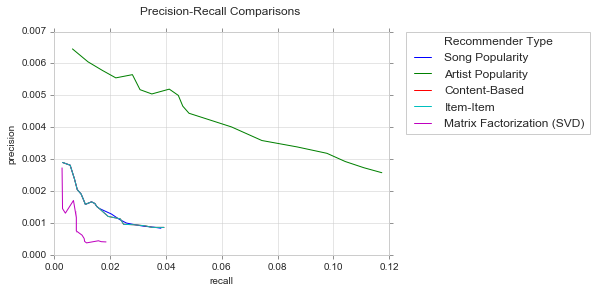

In [31]:
%matplotlib inline

sns.set_style("whitegrid")

sns.despine()

sns.lineplot(x='recall', y='precision', data = precision_recall_overall, 
             hue='Recommender Type', markers=True)

plt.title('Precision-Recall Comparisons \n')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.xticks(np.arange(0, 1.2, step=0.2))
#plt.yticks(np.arange(0, 1.2, step=0.2))

plt.show()

## IDEAS & NEXT STEPS

+ Add more data. Find out how much my machine can handle.
+ Parameter Tuning - *particularly item based, matrix factorization.*
+ Add interaction confidence? (matrix factorization)
+ Cross - Validation (kfolds = n)
+ Add other accuracy metrics
+ Bring other side information about items to improve performance (artist tags)?

# End of Notebook